# Reading output from AccuRT

In [1]:
import accuread as ar
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['ggplot'])


In [2]:
moddir = '../tests/testdata/'
d = ar.ReadART('demo1', # basename of simulation
               basefolder=moddir, # folder where the Output-folder is located
               scalar=True, # read scalar irradiance
               iops=True, # read iop file
               runvarfile='sza.txt' # add contents of this file to d.runvar not very flexible at the moment
              )

# Basic plots

The `plot` method is quite basic at the moment.

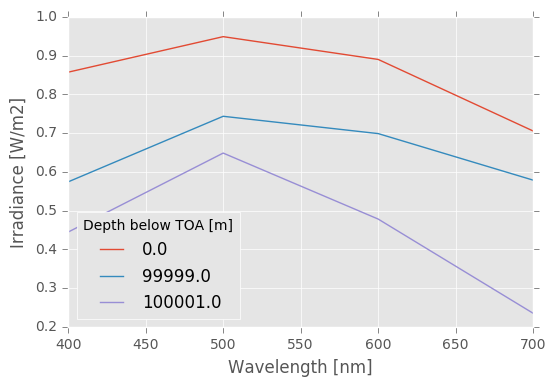

In [3]:
d.plot(run=2)

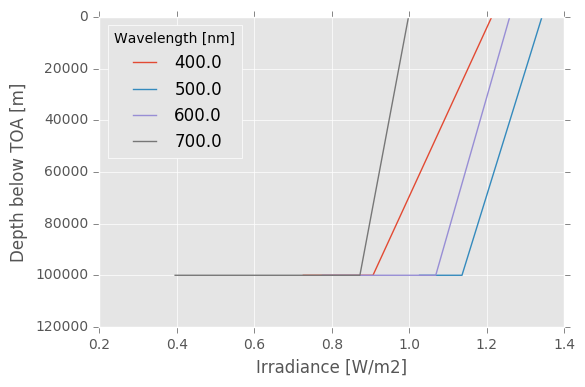

In [4]:
d.plot(profile=True)

# Calculate transmittance and albedo 

Can calculate either wavelength dependent or integrated.

In [5]:
d.transmittance(layers=(1,2),integrated=True)

array([ 0.76403963,  0.72655879])

In [6]:
d.albedo(layer=1,integrated=True)

array([ 0.05046739,  0.08058111])

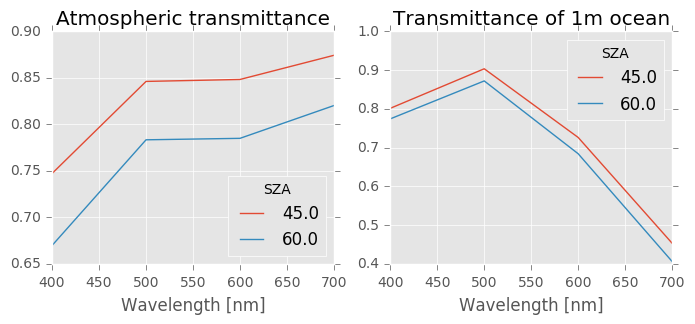

In [7]:
fig,ax = plt.subplots(ncols=2,figsize=(8,3))
ax[0].plot(d.wavelengths,d.transmittance(layers=(0,1)))
ax[1].plot(d.wavelengths,d.transmittance(layers=(1,2)))

ax[0].set_title('Atmospheric transmittance')
ax[1].set_title('Transmittance of 1m ocean')

for a in ax:
    a.legend([str(x) for x in d.runvar],loc='best',title='SZA')
    a.set_xlabel('Wavelength [nm]')

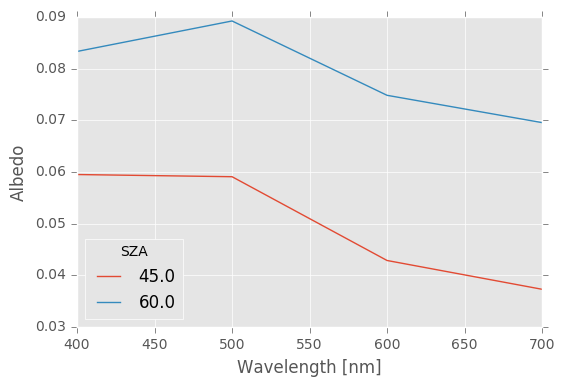

In [8]:
fig,ax = plt.subplots()
ax.plot(d.wavelengths,d.albedo(1))
ax.set_xlabel('Wavelength [nm]')
ax.set_ylabel('Albedo')
ax.legend([str(x) for x in d.runvar],loc='best',title='SZA')